In [3]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
country = geopandas.read_file("/Users/alxrpatrick/Documents/KULIAH/Semester_5/Probstok/gz_2010_us_040_00_5m.json")
country.head(n=50)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935..."
7,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ..."
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800..."
9,0400000US12,12,Florida,,53624.759,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ..."


In [13]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [14]:
type(country.geometry)

geopandas.geoseries.GeoSeries

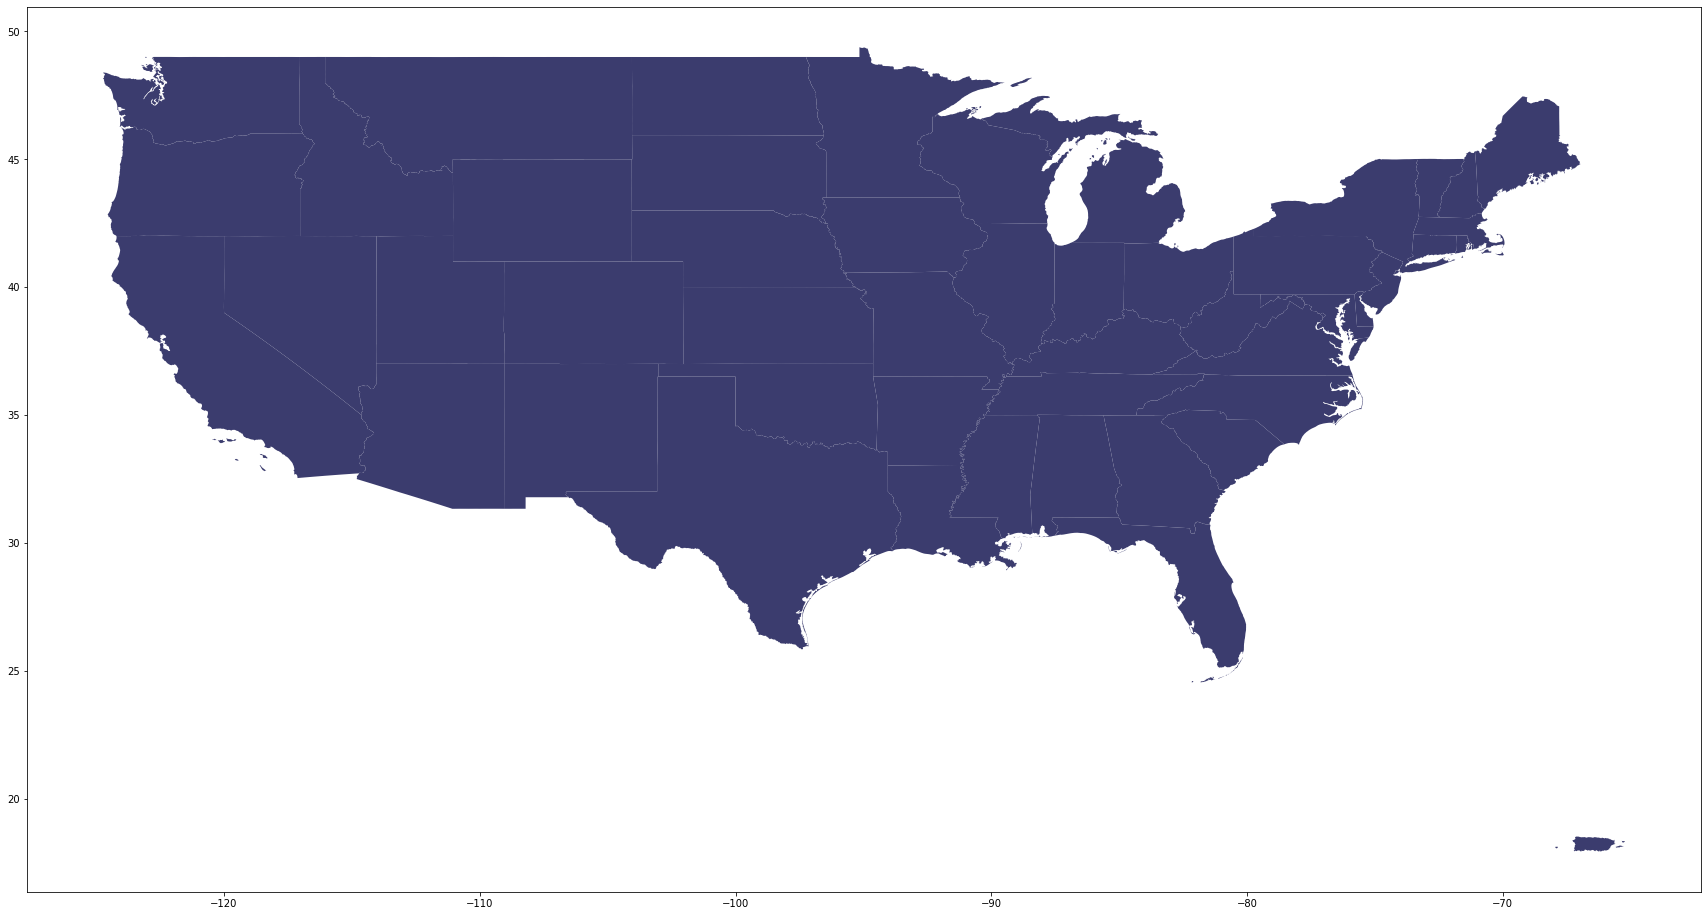

In [24]:
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');

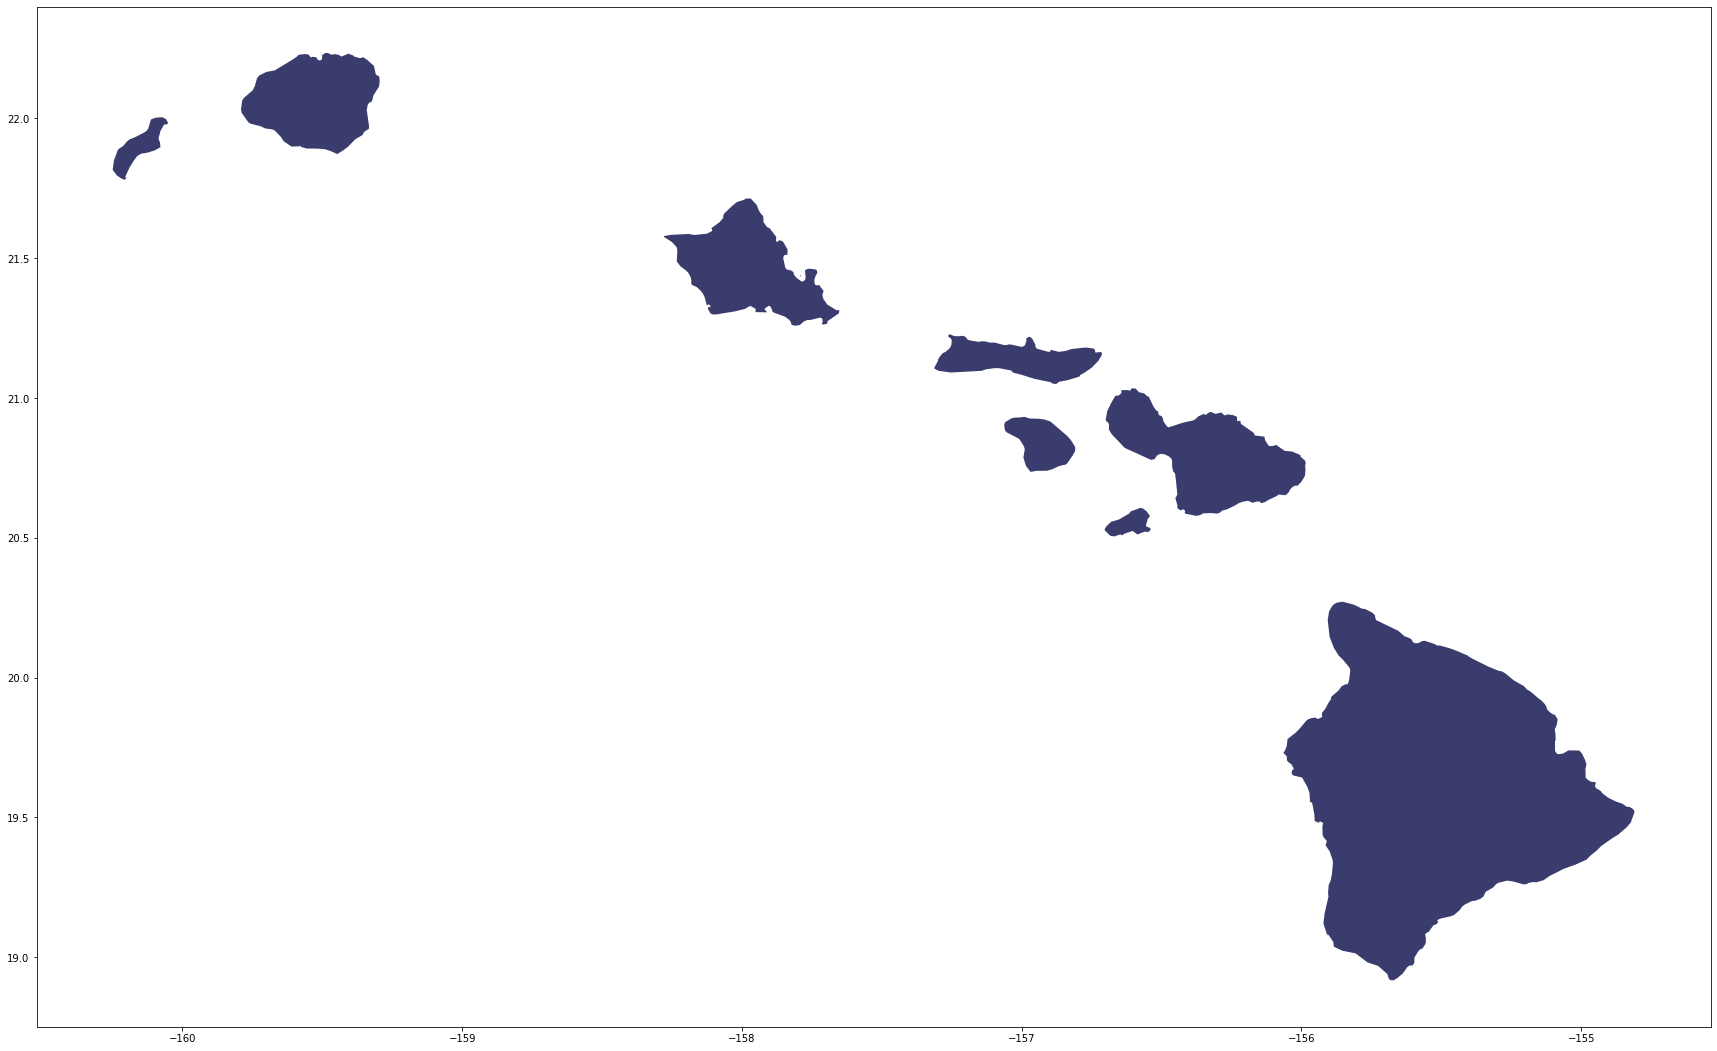

In [25]:
hawaii = country[country['NAME'].isin(['Hawaii']) == True]
hawaii.plot(figsize=(30,20), color='#3B3C6E');

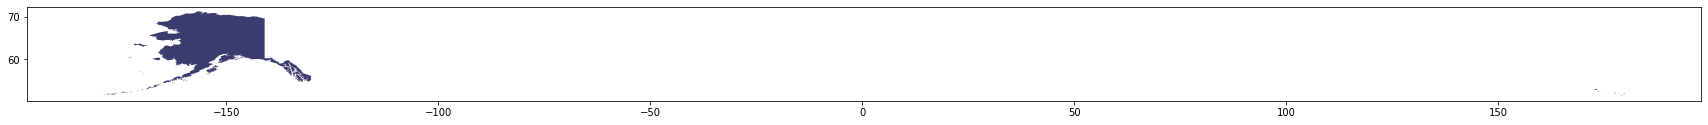

In [32]:
alaska = country[country['NAME'].isin(['Alaska']) == True]
alaska.plot(figsize=(30,20), color='#3B3C6E');

In [44]:
fast_food = pd.read_csv('/Users/alxrpatrick/Documents/KULIAH/Semester_5/Probstok/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants.csv')
fast_food.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [45]:
fast_food = fast_food.drop(['dateAdded', 'dateUpdated', 'keys', 'sourceURLs', 'websites'], axis=1)
fast_food.head()

,id,address,categories,city,country,latitude,longitude,name,postalCode,province
0,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
1,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
2,AVwcopQoByjofQCxgfVa,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN
3,AVweXN5RByjofQCxxilK,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN
4,AWQ6MUvo3-Khe5l_j3SG,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA


In [100]:
fast_food['coordinates'] = fast_food[['longitude', 'latitude']].values.tolist()
fast_food.head()

,id,address,categories,city,country,latitude,longitude,name,postalCode,province,coordinates
0,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,"[-90.81474200000001, 29.814697]"
1,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,"[-90.81474200000001, 29.814697]"
2,AVwcopQoByjofQCxgfVa,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN,"[-83.58055300000001, 35.803788]"
3,AVweXN5RByjofQCxxilK,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN,"[-83.551408, 35.782339]"
4,AWQ6MUvo3-Khe5l_j3SG,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA,"[-84.321143, 33.562738]"


In [101]:
fast_food['coordinates'] = fast_food['coordinates'].apply(Point)
fast_food.head()

,id,address,categories,city,country,latitude,longitude,name,postalCode,province,coordinates
0,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,POINT (-90.81474 29.81470)
1,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,POINT (-90.81474 29.81470)
2,AVwcopQoByjofQCxgfVa,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN,POINT (-83.58055 35.80379)
3,AVweXN5RByjofQCxxilK,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN,POINT (-83.55141 35.78234)
4,AWQ6MUvo3-Khe5l_j3SG,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA,POINT (-84.32114 33.56274)


## Most Popular Brands Across the Country

In [253]:
count_per_brand = fast_food.groupby('name').country.count().sort_values(ascending=False)
print_count = count_per_brand.head(n=10)
print(print_count)

name
McDonald's         1898
Taco Bell          1032
Burger King         833
Subway              776
Arby's              663
Wendy's             628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Domino's Pizza      215
Name: country, dtype: int64


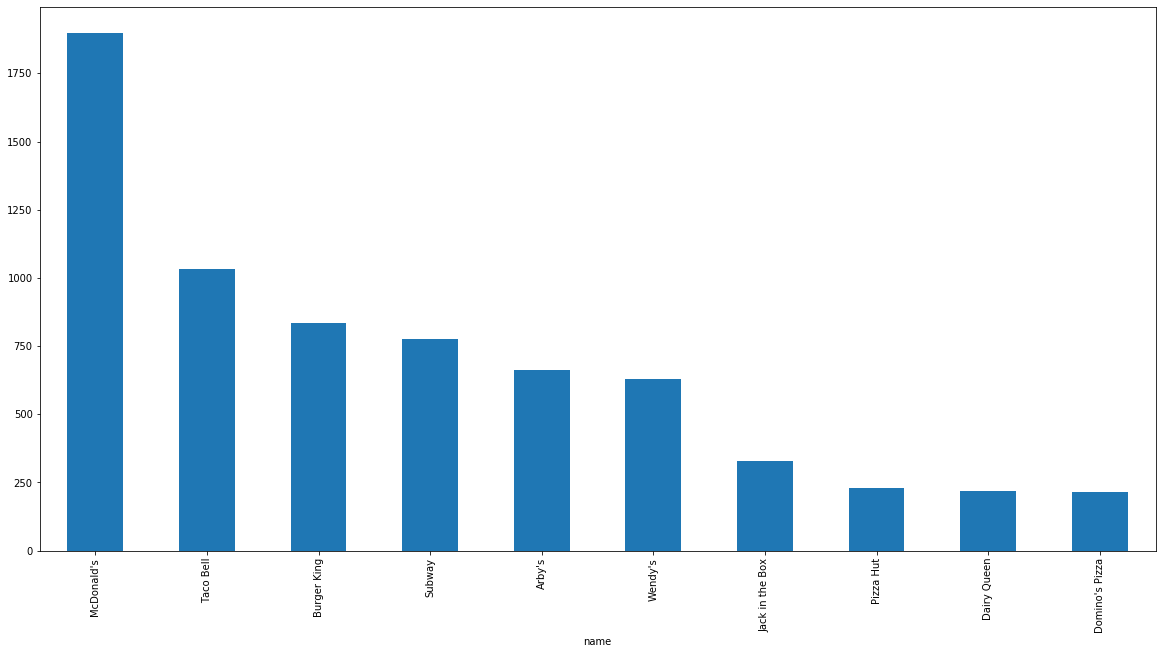

In [254]:
print_count.plot.bar(figsize=(20,10))

## Fast Food Statistic by State

### Numbers of Fast Food Restaurant Chain by State

In [239]:
by_province = fast_food.groupby(['province', 'name']).country.count()

print(by_province)

province  name                                           
AK        Ak Buffet                                           1
          Arby's                                              1
          Carl's Jr                                           2
          Dairy Queen                                         1
          Kumagoro Fine Japanese Restaurant and Sushi Bar     1
          McDonald's                                          1
          Pizza Hut                                           1
          Quiznos                                             1
          Subway                                              4
          Taco Bell                                           3
AL        Chick-fil-A                                         1
          Krystal                                             2
          Taco Bell                                           3
AR        Arby's                                              8
          Back Yard Burgers                   

### Number of Most Fast Food Restaurant Chains by State

In [237]:
print(by_province.sort_values(ascending=False).head(n=50))

province  name           
CA        McDonald's         155
TX        McDonald's         137
FL        McDonald's         137
CA        Jack in the Box    129
          Burger King        128
          Taco Bell          123
NY        McDonald's         105
PA        McDonald's         102
GA        McDonald's         100
OH        McDonald's          98
TX        Jack in the Box     92
CA        Carl's Jr.          79
IL        McDonald's          77
FL        Taco Bell           75
TN        McDonald's          72
MI        McDonald's          66
NC        McDonald's          65
OH        Subway              62
TX        Taco Bell           61
MI        Burger King         61
AZ        McDonald's          58
CA        Subway              57
FL        Wendy's             56
MN        McDonald's          56
MI        Taco Bell           55
AZ        Taco Bell           53
OH        Arby's              52
KY        McDonald's          51
OR        McDonald's          51
TX        Burger 

## McDonald's Across the Country

In [189]:
mcd = fast_food[fast_food['name']=="McDonald's"]
mcd.province.count()
mcd.groupby('province').country.count().sort_values(ascending=False)

province
CA    155
FL    137
TX    137
NY    105
PA    102
GA    100
OH     98
IL     77
TN     72
MI     66
NC     65
AZ     58
MN     56
OR     51
KY     51
LA     45
WA     44
MD     43
MO     35
MA     34
OK     34
WI     32
SC     28
NV     25
IA     22
NM     21
NJ     21
MS     19
WV     19
AR     18
SD     13
HI     12
MT     11
CT     10
VA     10
IN      9
UT      8
NH      7
CO      7
VT      7
NE      7
WY      6
ME      6
DE      5
ND      4
ID      3
KS      2
AK      1
Name: country, dtype: int64

## Fast Food Count per State

In [159]:
#fast_food.plot(figsize=(40,20))
count_per_state = fast_food.groupby('province').name.count().sort_values(ascending=False)
print(count_per_state)

province
CA    1201
TX     811
FL     621
OH     522
GA     420
IL     405
PA     383
MI     374
NY     352
AZ     330
TN     302
NC     295
IN     254
VA     253
MA     205
LA     202
MN     199
WA     196
WI     189
SC     188
MD     172
KY     166
OK     166
MO     163
OR     154
CO     148
NJ     129
NV     121
IA     115
AR     102
NE      87
NM      78
KS      74
WV      70
UT      63
MS      55
CT      53
ID      51
DE      44
SD      42
MT      38
ND      35
NH      34
HI      32
WY      29
ME      25
AK      16
RI      15
VT      15
AL       6
Name: name, dtype: int64


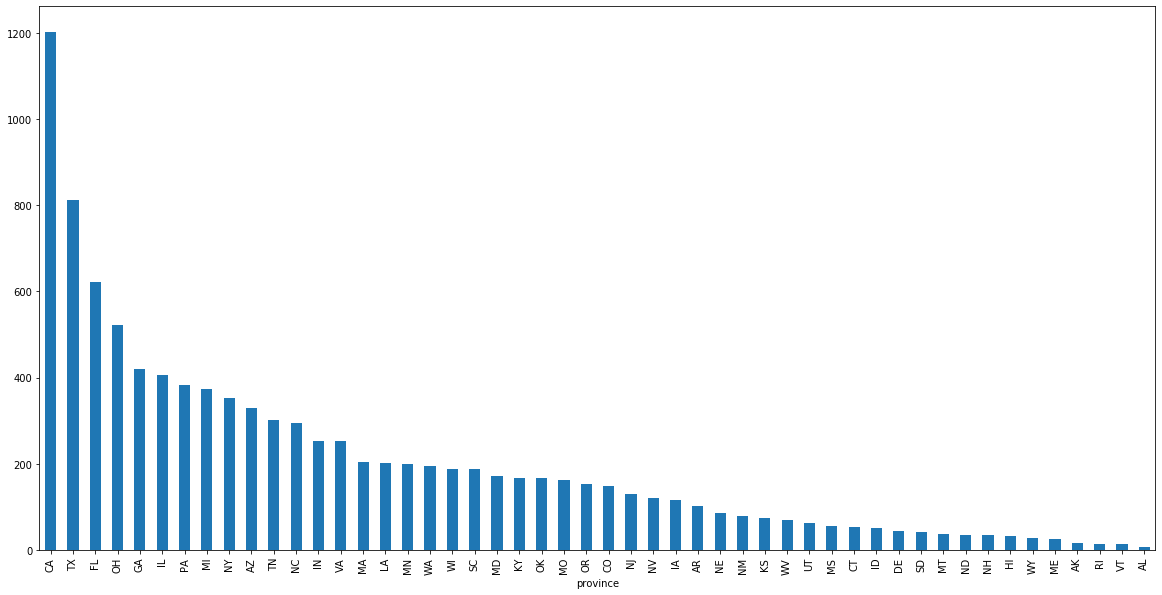

In [251]:
count_per_state.plot.bar(figsize=(20,10))

### US Map for Fast Food Branch Distribution

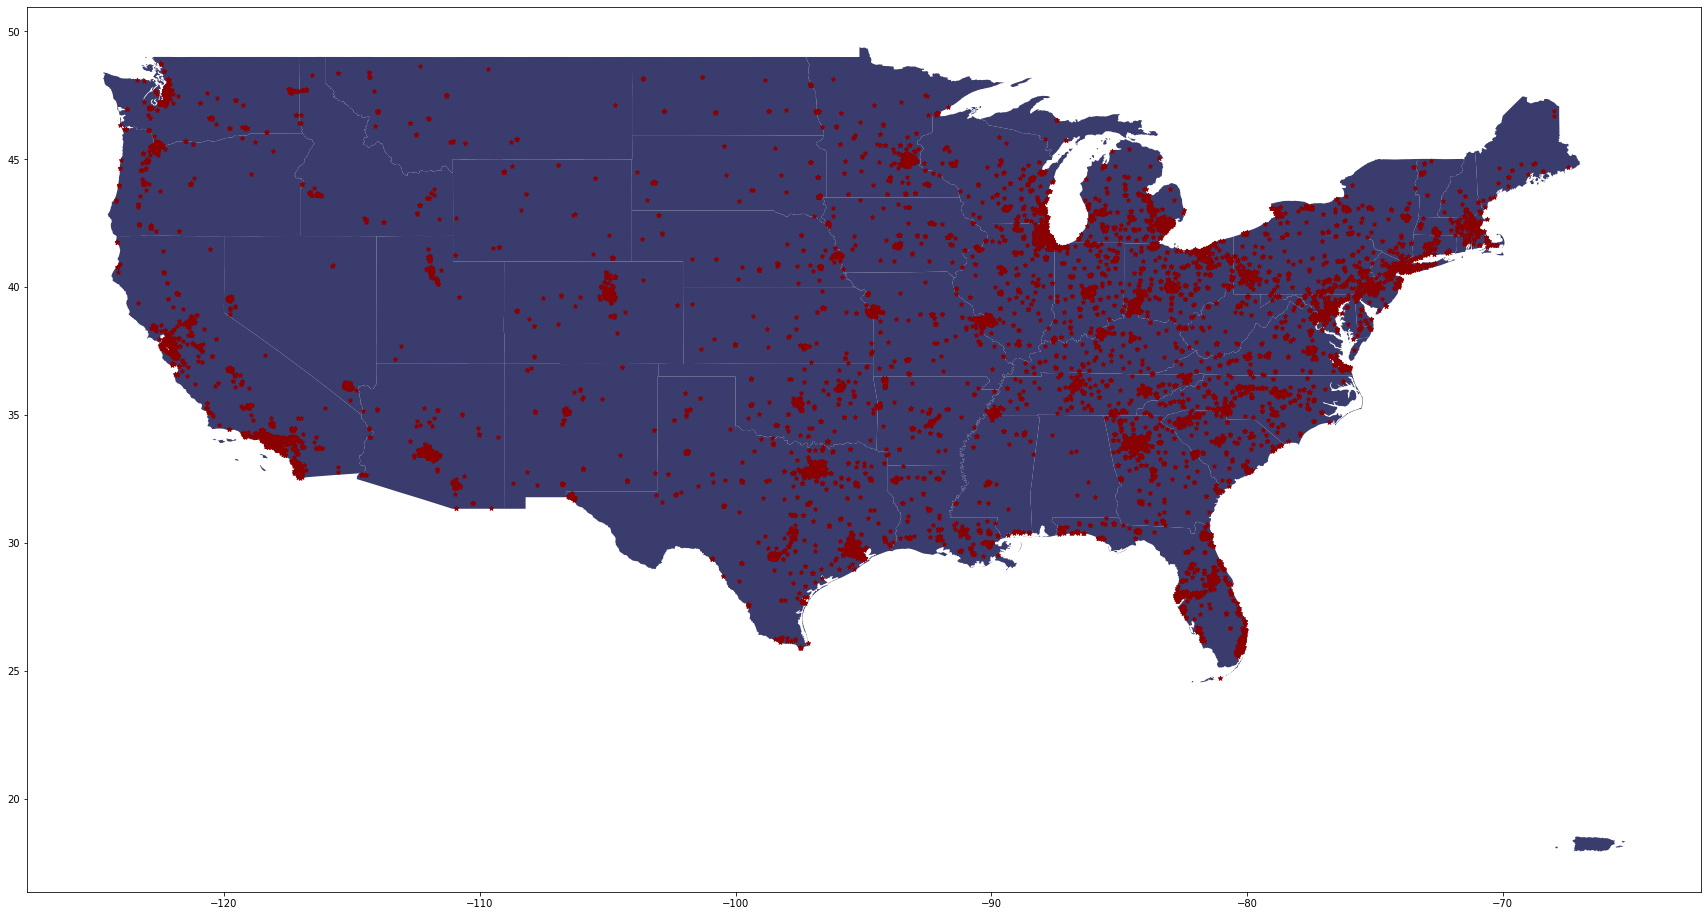

In [158]:
#fig, ax = plt.subplots(1, figsize=(30,20))
ff_ = fast_food[fast_food['province']!="AK"]
ff_america = ff_[ff_['province']!="HI"]
base = country[country['NAME'].isin(['Hawaii','Alaska']) == False].plot(figsize=(30,20), color='#3B3C6E');
ff_america.plot(ax=base, color='darkred', marker="*", markersize=20);

### Distribution Map for Hawaii

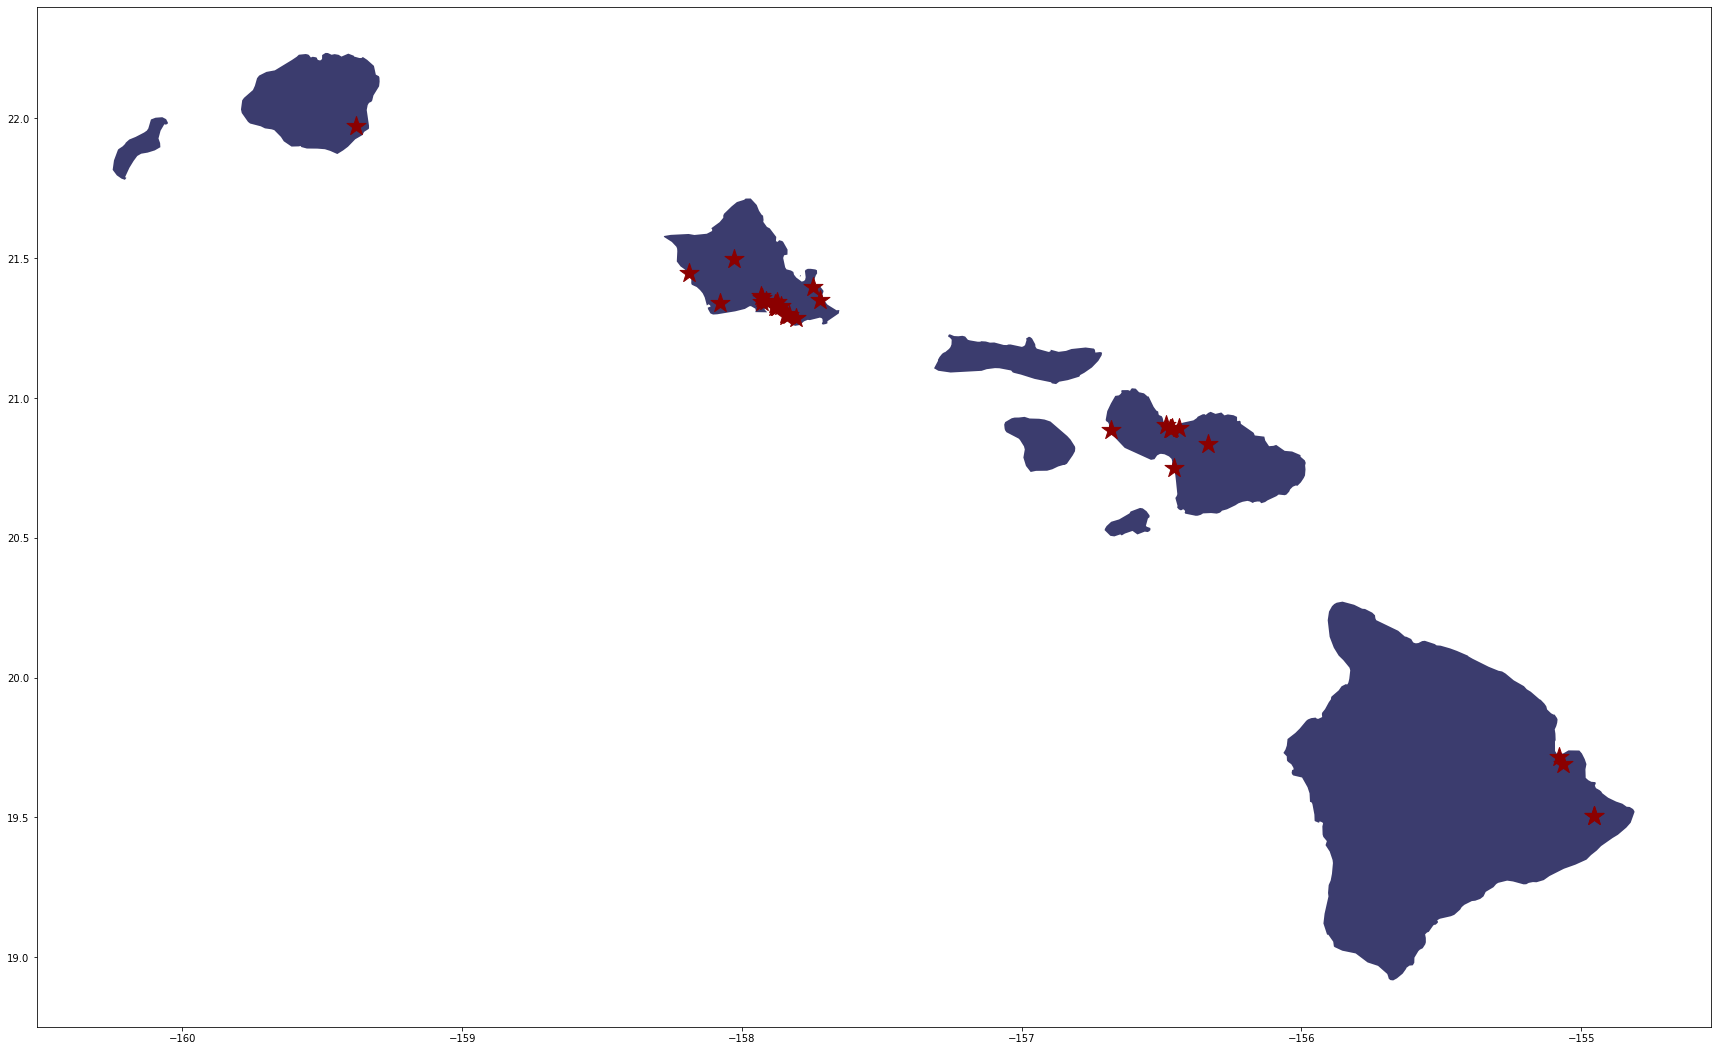

In [131]:
#hawaii
hawaii_ff = fast_food[fast_food['province']=="HI"]
base = country[country['NAME'].isin(['Hawaii']) == True].plot(figsize=(30,20), color='#3B3C6E');
hawaii_ff.plot(ax=base, color='darkred', marker="*", markersize=400);

### Distribution Map for Alaska

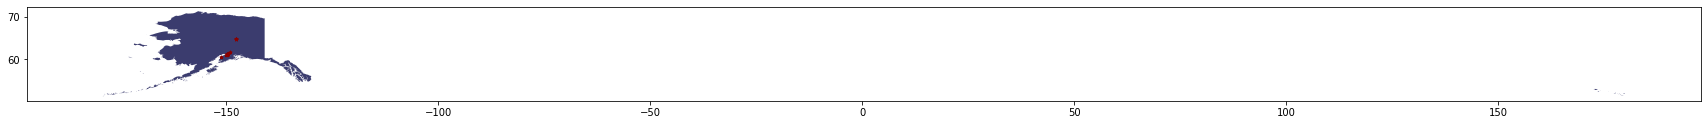

In [132]:
#alaska
alaska_ff = fast_food[fast_food['province']=="AK"]
base = country[country['NAME'].isin(['Alaska']) == True].plot(figsize=(30,20), color='#3B3C6E');
alaska_ff.plot(ax=base, color='darkred', marker="*", markersize=10);